In [2]:
!pip install opencv-python

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 61.8/61.8 MB 42.7 MB/s eta 0:00:0000:0100:01


In [3]:
import cv2 
import matplotlib.pyplot as plt 
import pandas as pd
import numpy as np

`-` 히스토그램 이퀄라이제이션(https://en.wikipedia.org/wiki/Histogram_equalization)

## 이미지 자료 다운로드

In [5]:
!wget https://upload.wikimedia.org/wikipedia/commons/0/08/Unequalized_Hawkes_Bay_NZ.jpg
img = cv2.imread('Unequalized_Hawkes_Bay_NZ.jpg')

--2023-02-22 16:32:29--  https://upload.wikimedia.org/wikipedia/commons/0/08/Unequalized_Hawkes_Bay_NZ.jpg
Resolving upload.wikimedia.org (upload.wikimedia.org)... 103.102.166.240, 2001:df2:e500:ed1a::2:b
Connecting to upload.wikimedia.org (upload.wikimedia.org)|103.102.166.240|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 110895 (108K) [image/jpeg]
Saving to: ‘Unequalized_Hawkes_Bay_NZ.jpg.1’

Unequalized_Hawkes_ 100%[===================>] 108.30K   519KB/s    in 0.2s    

2023-02-22 16:32:29 (519 KB/s) - ‘Unequalized_Hawkes_Bay_NZ.jpg.1’ saved [110895/110895]



In [8]:
img.shape  # 가로, 세로 픽셀, 채널(빨,녹,파..)

(683, 1024, 3)

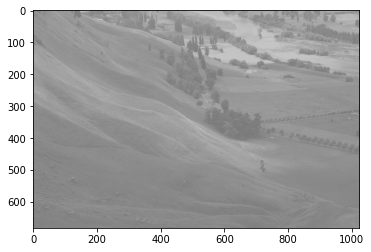

In [9]:
plt.imshow(img)

## 이미지 자료의 이해

### 비밀1: 이미지는 사실 숫자들의 집합이다.

`-` 예시1

In [11]:
_img1 = np.array([0,30,90,120,150,180,210,240,255]).reshape(3,3)
_img1

array([[  0,  30,  90],
       [120, 150, 180],
       [210, 240, 255]])

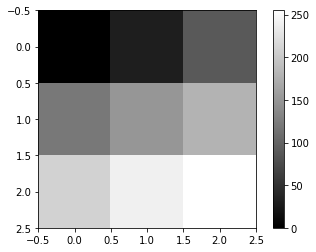

In [19]:
plt.imshow(_img1, cmap='gray')
plt.colorbar()

`-` 예시2

In [15]:
_img2 = np.array([0,20,40,60,80,100,120,140,160]).reshape(3,3)
_img2

array([[  0,  20,  40],
       [ 60,  80, 100],
       [120, 140, 160]])

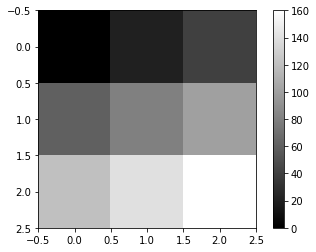

In [18]:
plt.imshow(_img2, cmap='gray')
plt.colorbar()

`-` 예시3

In [25]:
_img3=np.concatenate([_img1, _img2], axis=1)
_img3

array([[  0,  30,  90,   0,  20,  40],
       [120, 150, 180,  60,  80, 100],
       [210, 240, 255, 120, 140, 160]])

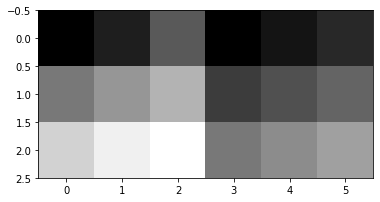

In [27]:
plt.imshow(_img3, cmap='gray')

### 비밀2: 칼라이미지는 red + green + blue 의 조합으로 표현가능 (다른방식도 가능)

`-` 예시1

In [42]:
r=np.array([0]*25*3).reshape(5,5,3)
g=np.array([0]*25*3).reshape(5,5,3)
b=np.array([0]*25*3).reshape(5,5,3)


In [45]:
r[:3,:3,0] = 255   
g[:3,2:,1] = 255 
b[2:,:,2] = 255

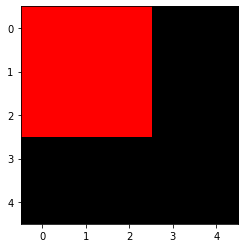

In [46]:
plt.imshow(r)

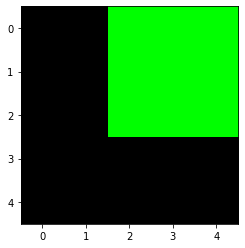

In [47]:
plt.imshow(g)

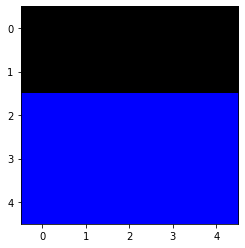

In [48]:
plt.imshow(b)

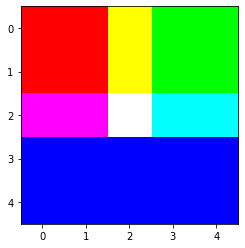

In [52]:
plt.imshow(r+g+b)   # 빛의 3원색..색의 3원색

`-` 예시2: R,G,B를 같은 비율로 섞으면 무채색이 된다.

In [53]:
r = np.array([0]*25*3).reshape(5,5,3) 
g = np.array([0]*25*3).reshape(5,5,3) 
b = np.array([0]*25*3).reshape(5,5,3) 
r[:3,:3,0] = 80   
g[:3,2:,1] = 80
b[2:,:,2] = 80 

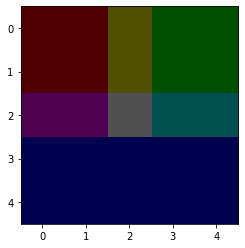

In [54]:
plt.imshow(r+g+b)

`-` 예시3

In [56]:
img.shape

(683, 1024, 3)

In [57]:
img_red = img * 0
img_green = img * 0
img_blue = img * 0

In [58]:
img_red[...,0] = img[...,0]
img_green[...,0] = img[...,1]
img_blue[...,0] = img[...,2]

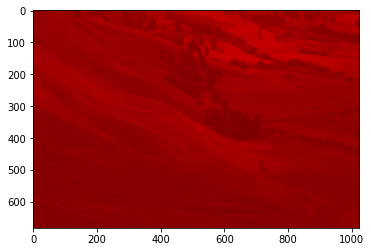

In [59]:
plt.imshow(img_red)

In [ ]:
plt.imshow(img_red)

## 히스토그램 이퀄라이제이션

`-` 이미지를 rgb로 각각 분리하고 각 색깔들의 히스토그램을 그려보자.

In [62]:
img_red[:,:,0].reshape(-1).shape

(699392,)

In [65]:
img_red[:,:,0].shape  # 위 699392 = 683 * 1024

(683, 1024)

(array([  3691.,  56282., 235628., 170392., 120545.,  60511.,  22052.,
         14354.,  15246.,    691.]),
 array([114. , 123.4, 132.8, 142.2, 151.6, 161. , 170.4, 179.8, 189.2,
        198.6, 208. ]),
 <BarContainer object of 10 artists>)

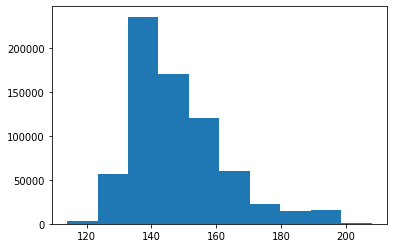

In [67]:
plt.hist(img[:,:,0].reshape(-1))

(array([1.0000e+00, 0.0000e+00, 1.0000e+00, 0.0000e+00, 0.0000e+00,
        1.2000e+01, 0.0000e+00, 0.0000e+00, 1.9000e+01, 0.0000e+00,
        4.9000e+01, 0.0000e+00, 0.0000e+00, 9.3000e+01, 0.0000e+00,
        0.0000e+00, 2.2000e+02, 0.0000e+00, 4.8800e+02, 0.0000e+00,
        0.0000e+00, 1.0610e+03, 0.0000e+00, 0.0000e+00, 1.7470e+03,
        0.0000e+00, 0.0000e+00, 2.1600e+03, 0.0000e+00, 2.7180e+03,
        0.0000e+00, 0.0000e+00, 3.2590e+03, 0.0000e+00, 0.0000e+00,
        4.0390e+03, 0.0000e+00, 5.1080e+03, 0.0000e+00, 0.0000e+00,
        6.3950e+03, 0.0000e+00, 0.0000e+00, 8.4630e+03, 0.0000e+00,
        0.0000e+00, 1.0610e+04, 0.0000e+00, 1.3530e+04, 0.0000e+00,
        0.0000e+00, 1.6115e+04, 0.0000e+00, 0.0000e+00, 1.9125e+04,
        0.0000e+00, 2.2186e+04, 0.0000e+00, 0.0000e+00, 2.5696e+04,
        0.0000e+00, 0.0000e+00, 2.8701e+04, 0.0000e+00, 0.0000e+00,
        2.8324e+04, 0.0000e+00, 2.5759e+04, 0.0000e+00, 0.0000e+00,
        2.4369e+04, 0.0000e+00, 0.0000e+00, 2.35

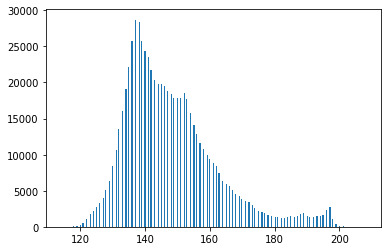

In [68]:
plt.hist(img_red[:,:,0].reshape(-1),bins=255)

- 히스토그램 그림1

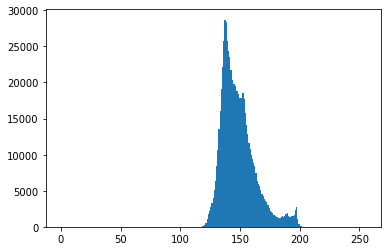

In [72]:
_fig = plt.hist(img_red[:,:,0].reshape(-1),bins=255, range=[0,255])
# 위의 숫자 보기 싫으니까 걍 _fig로 받으면 그림만 나온다.
# 빨간색 말고 그린, 블루도 다 같은 모양의 그림이 나옴

- 히스토그램 그림 2
- 120~200 사이에 값이 몰려있음
- 그런데 컴퓨터가 표현가능한 색은 0~244..
- 만약에 120-200까지의 분포된 모양은 그대로 유지하면서 range를 0-255까지 늘린다면?

`-` 분포의 모양은 대략적으로 유지하면서 값을 퍼트리자

In [73]:
img2_red = cv2.equalizeHist(img[...,0])

(array([59973., 57426., 82721., 73706., 61999., 76539., 72114., 72030.,
        72601., 70283.]),
 array([  0. ,  25.5,  51. ,  76.5, 102. , 127.5, 153. , 178.5, 204. ,
        229.5, 255. ]),
 <BarContainer object of 10 artists>)

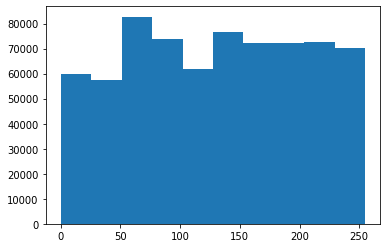

In [74]:
plt.hist(img2_red.reshape(-1))

히스토그램이 평평해졌네?

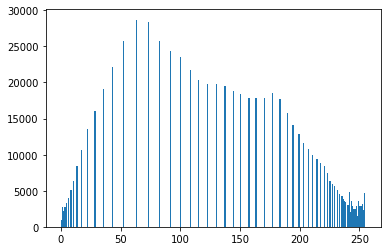

In [75]:
_fig=plt.hist(img2_red.reshape(-1), bins=255, range=(0,255))

`-` red말고 다른채널에도 이와 같은 변환을 정의한다면?

In [80]:
img2=np.stack([img2_red,img2_red,img2_red],axis=-1)   # 색깔 3개 합치기 위해서

In [81]:
img2.shape

(683, 1024, 3)

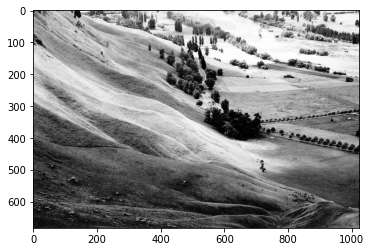

In [82]:
plt.imshow(img2)

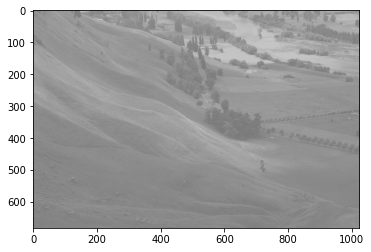

In [83]:
plt.imshow(img) #원래이미지

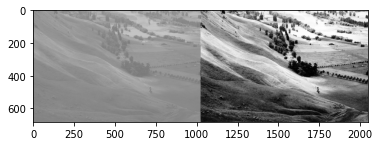

In [85]:
plt.imshow(np.concatenate([img,img2],axis=1))


## 히스토그램 이퀄라이제이션 (흑백버전)

In [89]:
img_black =  cv2.imread('Unequalized_Hawkes_Bay_NZ.jpg',0)
# 컴마하고 0하면 흑밸처리된다

In [90]:
img_black.shape

(683, 1024)

In [87]:
img_black2 = cv2.equalizeHist(img_black)

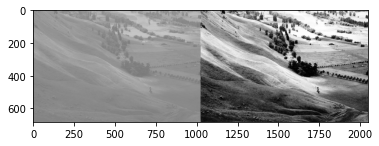

In [88]:
plt.imshow(np.concatenate([img_black,img_black2],axis=1),cmap='gray')

## 숙제

HE(Histogram Equalization)을 이용하여 아래주소에 저장된 이미지의 명암비를 보존하라

https://raw.githubusercontent.com/guebin/2021DV/master/_notebooks/hw_img.png

In [93]:
!wget https://raw.githubusercontent.com/guebin/2021DV/master/_notebooks/hw_img.png
hw = cv2.imread('hw_img.png')

--2023-02-22 17:18:34--  https://raw.githubusercontent.com/guebin/2021DV/master/_notebooks/hw_img.png
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.111.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 120618 (118K) [image/png]
Saving to: ‘hw_img.png.2’

hw_img.png.2        100%[===================>] 117.79K  --.-KB/s    in 0.01s   

2023-02-22 17:18:34 (10.4 MB/s) - ‘hw_img.png.2’ saved [120618/120618]



In [94]:
hw.shape

(531, 468, 3)

In [95]:
hw_2 = cv2.equalizeHist(hw[...,0])

In [96]:
hw_2.shape

(531, 468)

In [97]:
hw2=np.stack([hw_2,hw_2,hw_2],axis=-1)

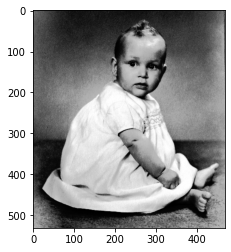

In [99]:
plt.imshow(hw2)

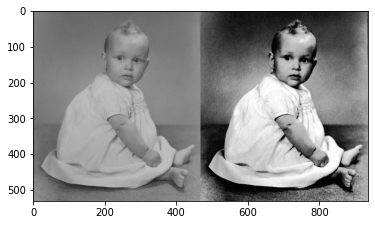

In [101]:
plt.imshow(np.concatenate([hw,hw2],axis=1))